# 교통사고 분석

## 자동차 사망율, 부상율, 경상율

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import set_matplotlib_formats


In [2]:
set_matplotlib_formats('retina')

In [3]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [4]:
df = pd.read_csv(r'C:\Users\park\Documents\data_set\한국도로공사_교통사고통계_20191231.csv', encoding='cp949')

In [5]:
df.head()

,연도,사고,사망,부상
0,2000,3910,569,2845
1,2001,3638,456,2331
2,2002,3957,421,2115
3,2003,3585,348,1843
4,2004,3242,300,1555


<AxesSubplot:xlabel='연도', ylabel='사망'>

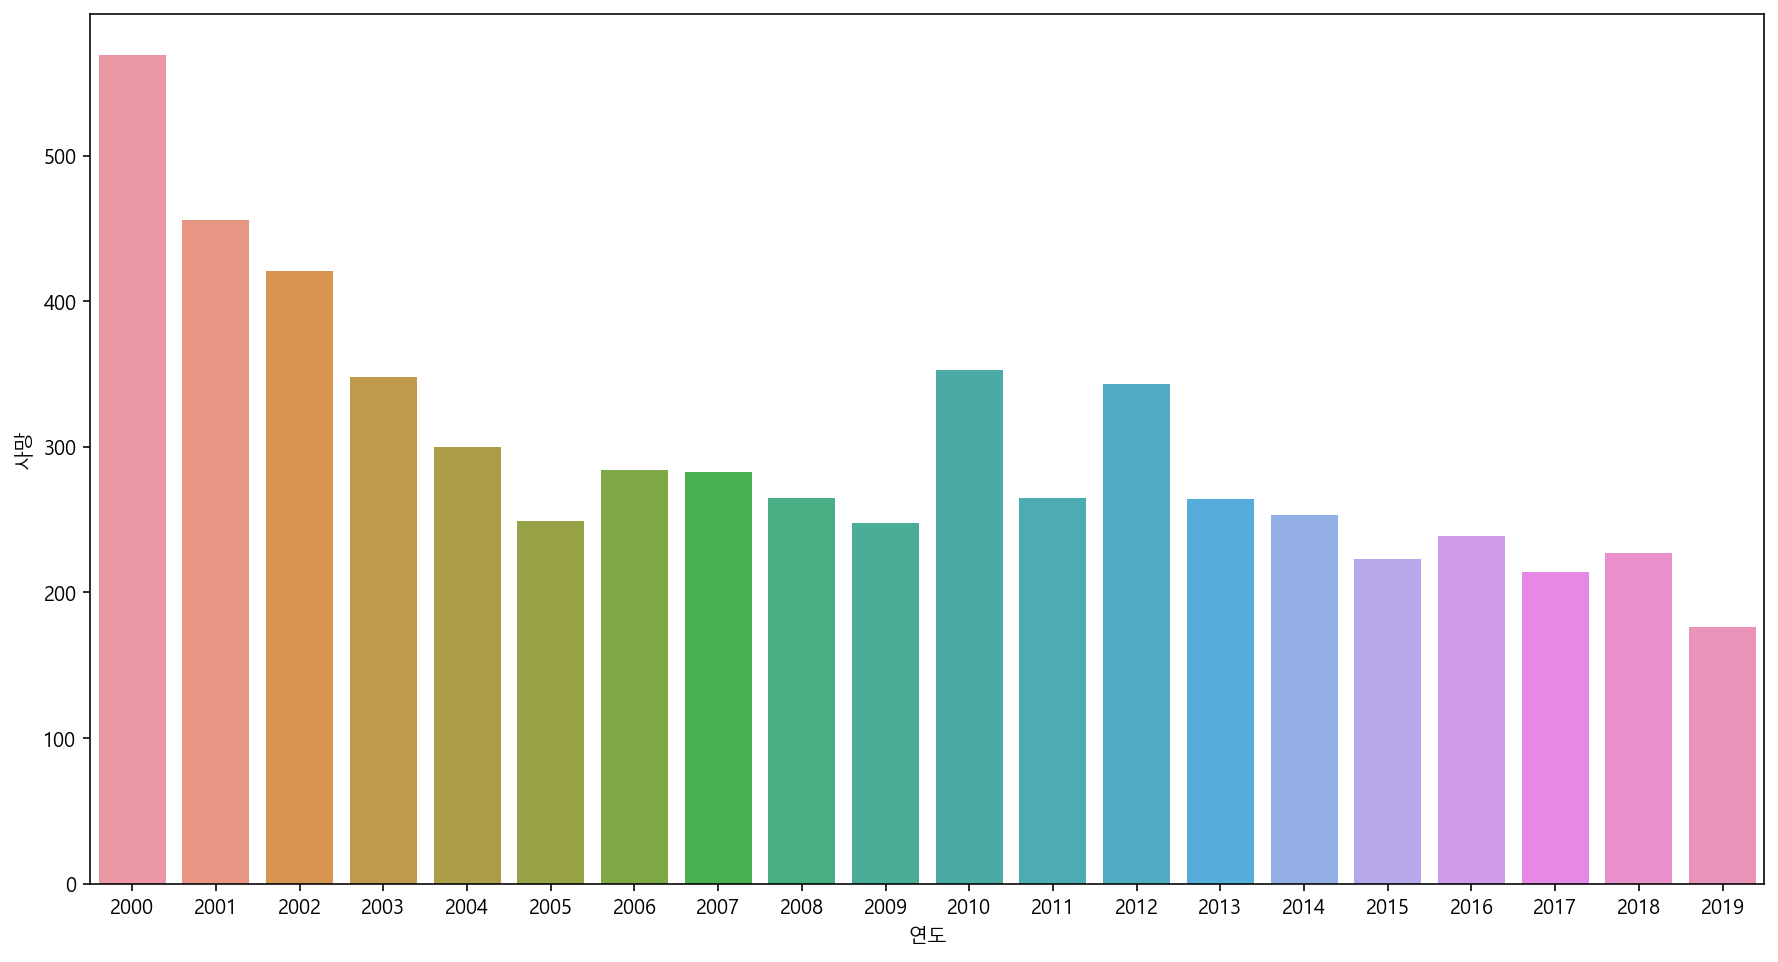

In [6]:
plt.figure(figsize=(15,8))

sns.barplot(data = df, x='연도', y='사망')

In [7]:
df['사망율'] = (df['사망']) / (df['사고'])
df['부상율'] = (df['부상']) / (df['사고'])
df['경상율'] = 1 - df['부상율'] - df['사망율']


In [8]:
df_rate = df[['연도', '사망율','부상율','경상율']].copy()

In [9]:
df_rate.head()

,연도,사망율,부상율,경상율
0,2000,0.145524,0.727621,0.126854
1,2001,0.125344,0.640737,0.233920
2,2002,0.106394,0.534496,0.359110
3,2003,0.097071,0.514086,0.388842
4,2004,0.092535,0.479642,0.427822


In [78]:
df.columns

Index(['연도', '사고', '사망', '부상', '사망율', '부상율', '경상율'], dtype='object')

In [80]:
df.columns = ['연도', '사고건수', '사망건수', '부상건수', '사망율', '부상율', '경상율']

## 자동차 사고 보험료

In [81]:
df_p = pd.read_excel(r'C:\Users\park\Documents\data_set\1_자동차보험진료비전체현황.xls',header=6)

In [82]:
df_p.to_csv('자동차보험진료비.csv', index=False)

In [83]:
df_p_csv = pd.read_csv(r'C:\python_workspace\Study\6_inf_data_analysis\Data_analysis_project\자동차보험진료비.csv')

In [84]:
df_p_csv.head()

,연도,분기,월,청구건수,진료비,입내원일수,건당진료비,입내원일당진료비
0,2014,총계,NaN,13177862,1423403698,21697740,108015,65601
1,2015,총계,NaN,14429573,1555795211,22696293,107820,68548
2,2015,1/4,NaN,3541431,385272843,5720068,108790,67355
3,2015,2/4,NaN,3432563,365963862,5378611,106615,68041
4,2015,3/4,NaN,3547048,387299835,5564535,109189,69601


In [85]:
df_p_csv.shape

(38, 8)

In [86]:
df_p_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연도        38 non-null     int64 
 1   분기        38 non-null     object
 2   월         16 non-null     object
 3   청구건수      38 non-null     int64 
 4   진료비       38 non-null     int64 
 5   입내원일수     38 non-null     int64 
 6   건당진료비     38 non-null     int64 
 7   입내원일당진료비  38 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ KB


In [87]:
pd.options.display.float_format = '{:.3f}'.format
g = df_p.groupby(['연도'])[['청구건수','진료비','입내원일수']].mean().copy()
df_pp = g.reset_index()

In [88]:
df_pp

,연도,청구건수,진료비,입내원일수
0,2014,13177862.000,1423403698.000,21697740.000
1,2015,5771829.200,622318084.600,9078517.200
2,2016,6210308.400,663448587.000,9340258.400
3,2017,6350407.600,707920329.200,9389590.400
4,2018,6971554.800,790477055.600,10004478.400
5,2019,3471274.235,390749177.235,4764131.118


In [89]:
df_pp.isnull().sum()

연도       0
청구건수     0
진료비      0
입내원일수    0
dtype: int64

In [138]:
df_merge = df_pp.merge(df)
df_merge = df_merge.rename(columns={'진료비':'자동차보험진료비'}).copy()

Text(0.5, 1.0, '자동차 사고 및 보험진료비 데이터 상관관계 분석')

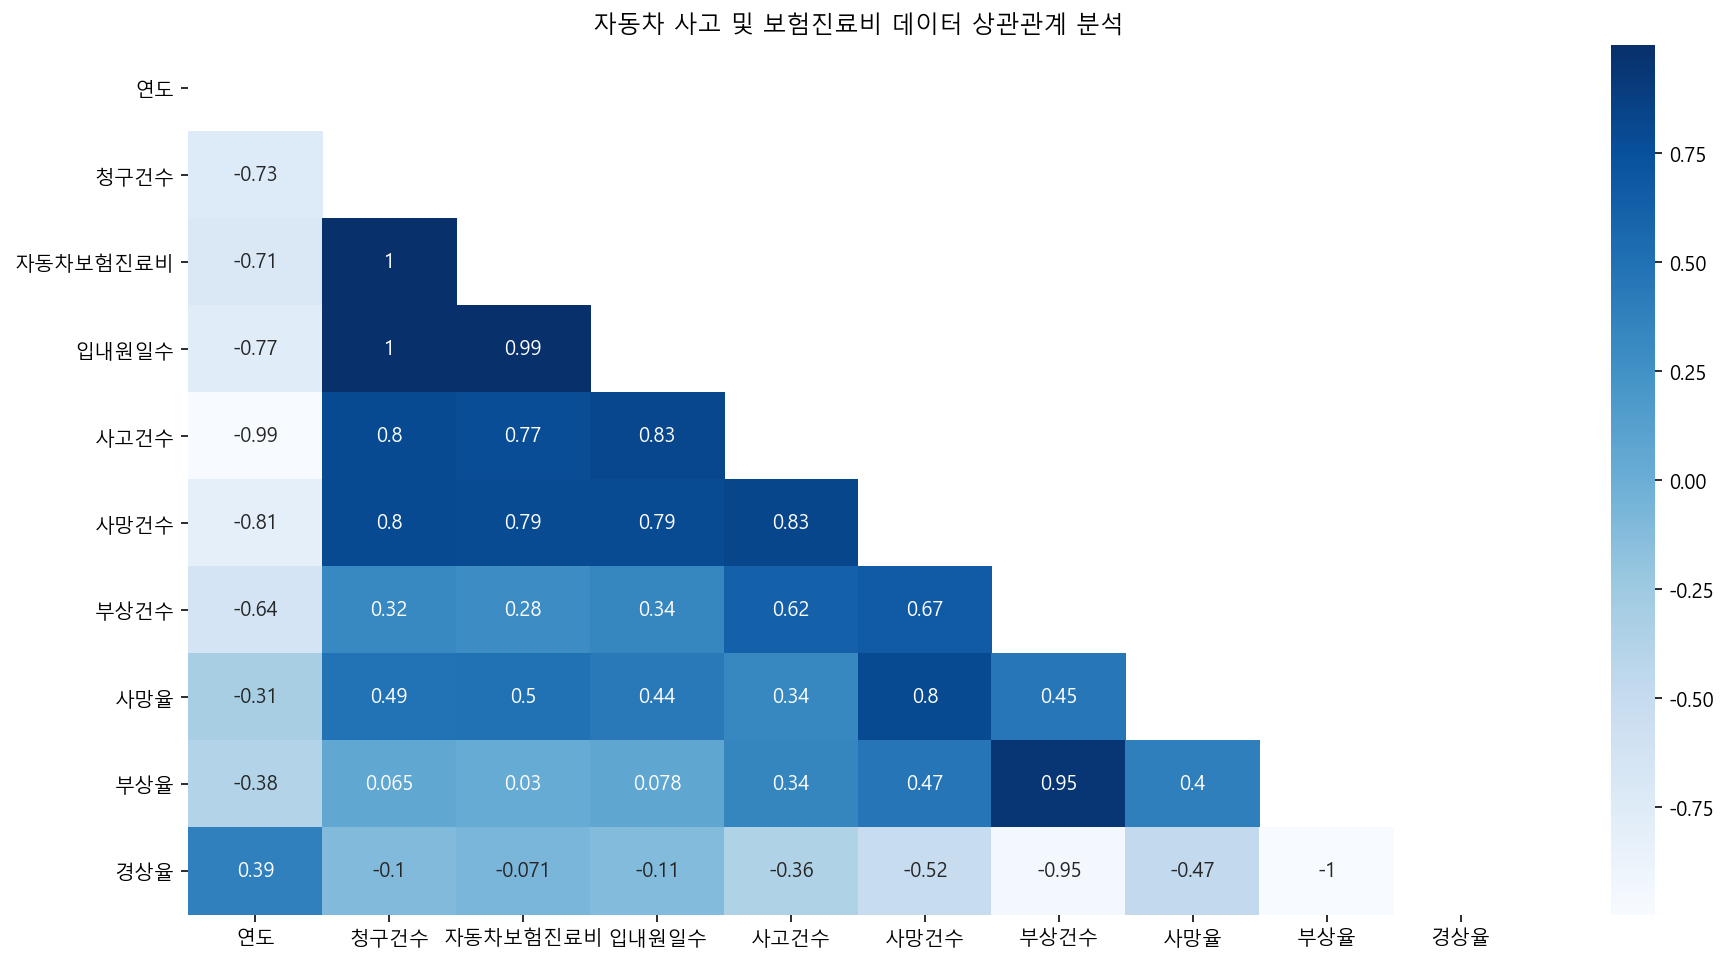

In [140]:
corr = df_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap = 'Blues', mask = mask).set_title('자동차 사고 및 보험진료비 데이터 상관관계 분석')

In [141]:

p = df_merge.pivot_table(index = '연도')

<AxesSubplot:xlabel='연도'>

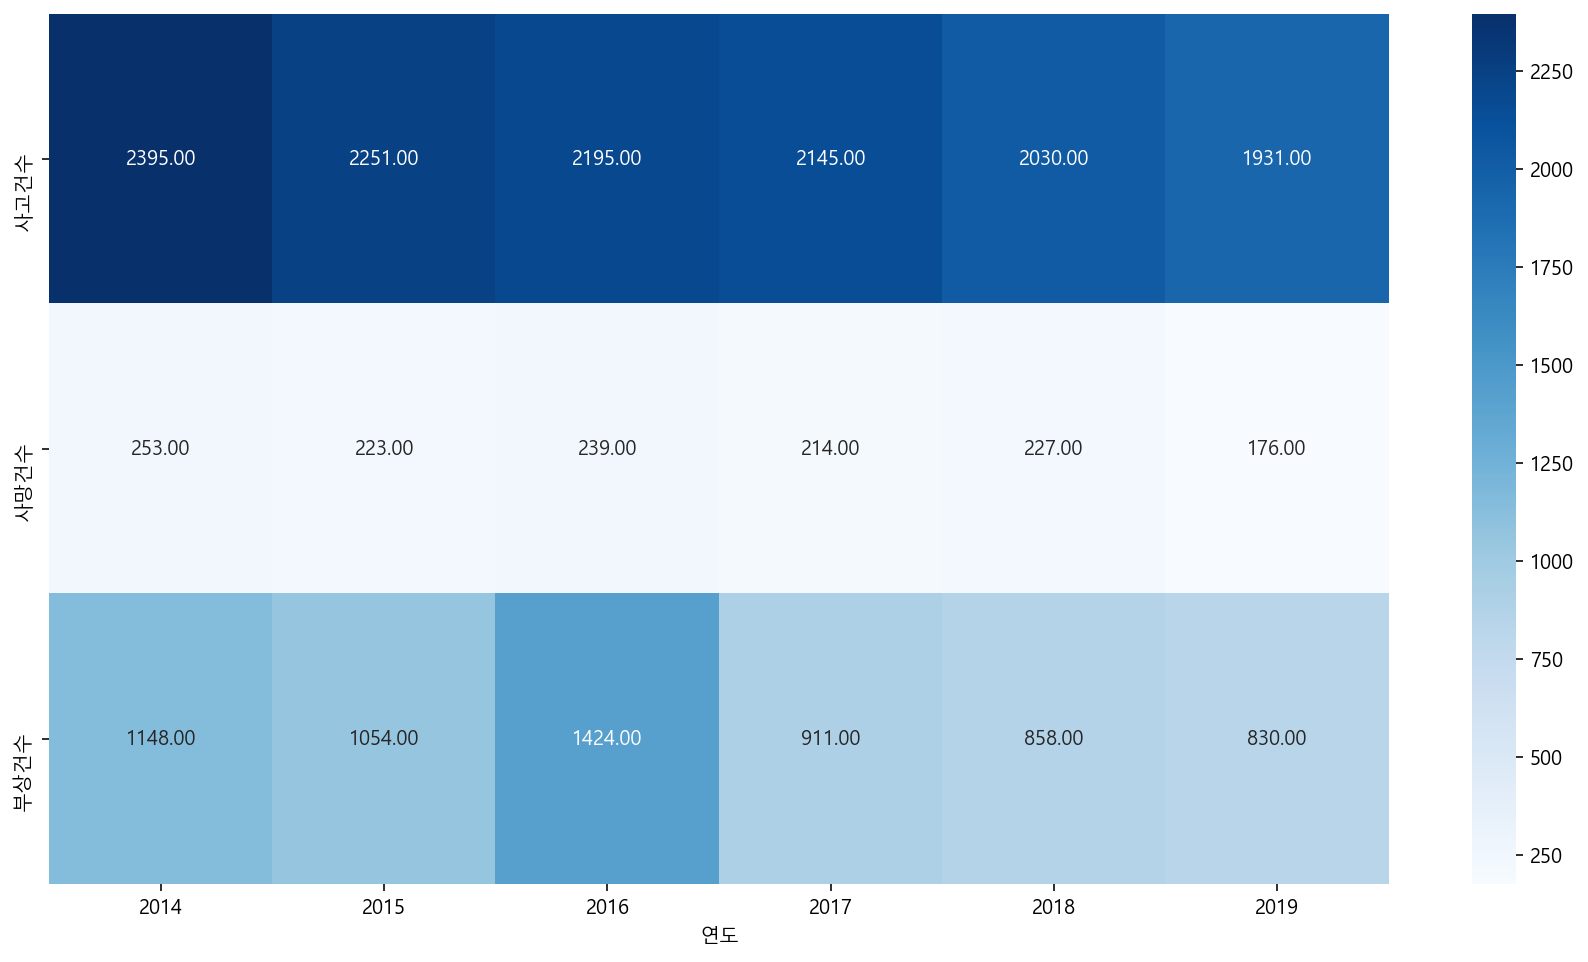

In [142]:
plt.figure(figsize=(15,8))
sns.heatmap(p[['사고건수','사망건수','부상건수']].T, annot=True,fmt='.2f', cmap='Blues')

<AxesSubplot:xlabel='연도'>

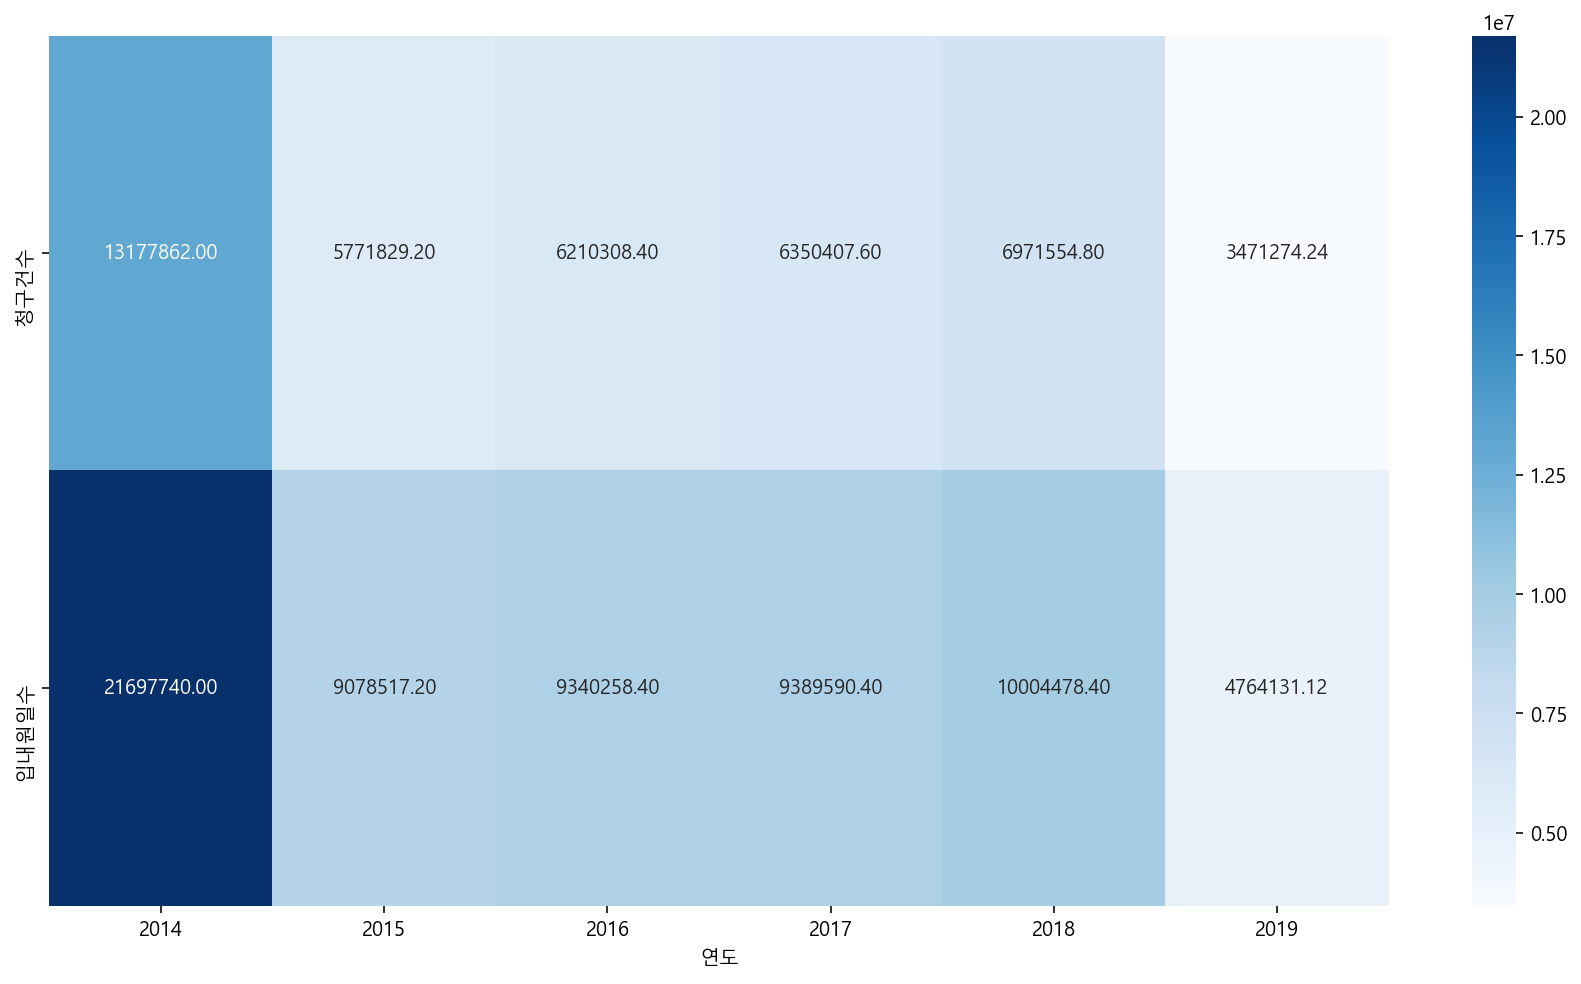

In [143]:
plt.figure(figsize=(15,8))
sns.heatmap(p[['청구건수','입내원일수']].T, annot=True,fmt='.2f', cmap='Blues')

C:\Users\park\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

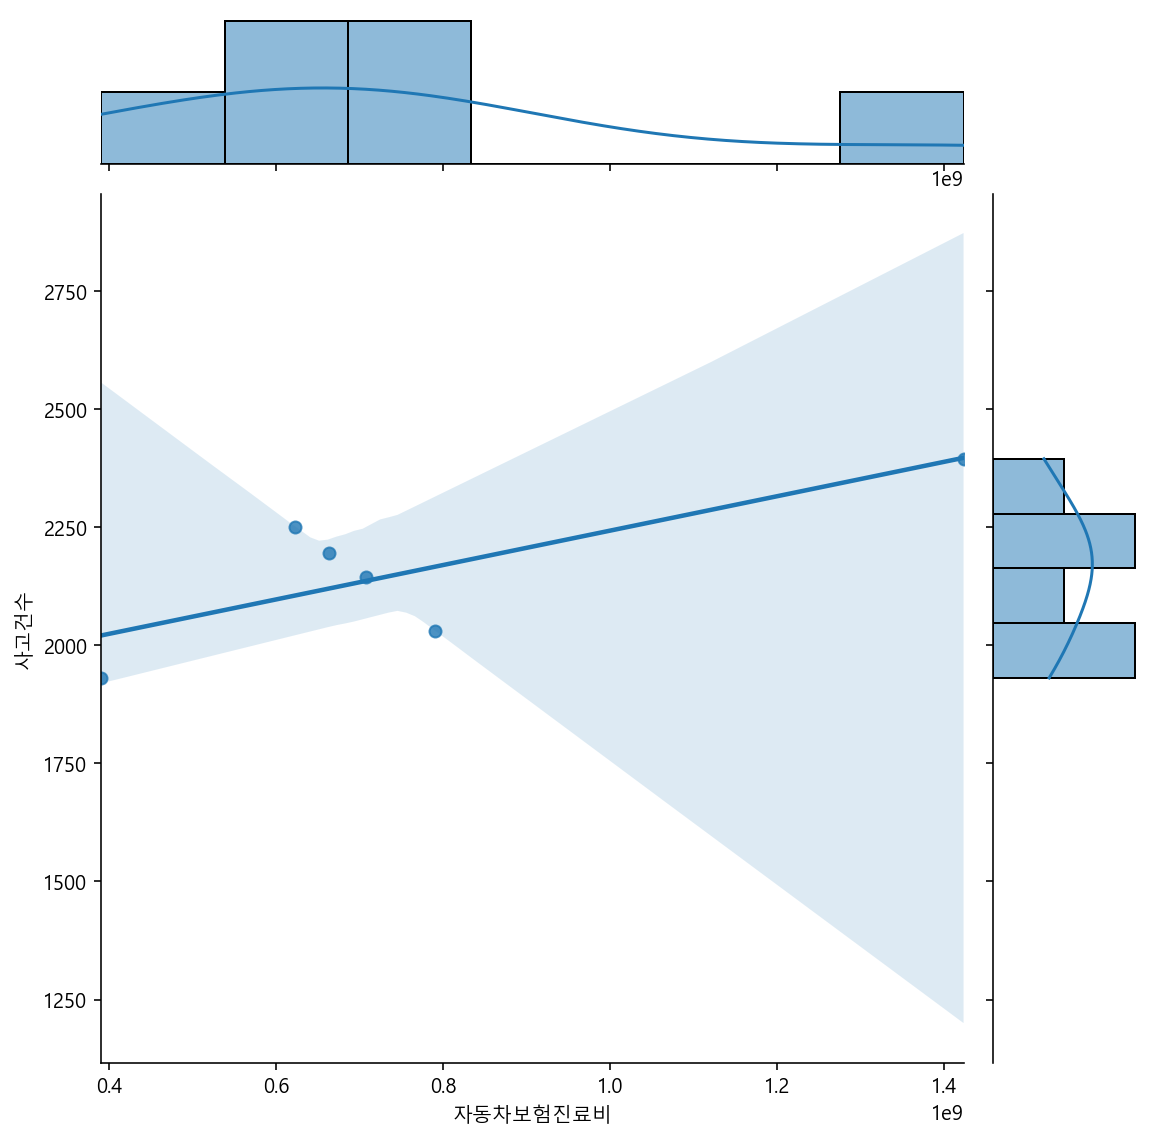

In [152]:
plt.figure(figsize=(15,8))
sns.jointplot("자동차보험진료비", "사고건수", height=8, data=df_merge, kind="reg")
plt.show()